In [129]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [130]:
import sys
sys.path.append('/glade/u/home/linnia/ctsm6_ppe/')
from utils.pyfunctions import *
utils_path = '/glade/u/home/linnia/ctsm6_ppe/utils/'

In [131]:
def rank_plot(x,g,xlab,tstr,topn=8,ax=None):

    if not ax:
        fig=plt.figure(figsize=[3,4])
        ax=fig.add_subplot()
    

    xq=xr.DataArray([x.groupby(g[p]).mean() for p in g.data_vars],dims=['param','qnt'])
    xq['param']=g.data_vars
    ix=np.argsort(abs(xq.isel(qnt=-1)-xq.isel(qnt=0)))[-topn:]
    nq=len(xq.qnt)
    q=np.arange(nq)/nq-1
    
    
    
    ax.plot([x.isel(ens=0),x.isel(ens=0)],[-1,topn],':k')
    for i,j in enumerate(ix.values):
        param=xq.param[j]
        ax.plot(xq.sel(param=param),np.zeros(nq)+i,'-ro',mfc='none')
        ax.plot(xq.sel(param=param,qnt=nq-1),i,'ro')
    
    ax.set_xlabel(xlab)
    ax.set_ylim([-0.5,topn-0.5])
    ax.set_yticks(range(topn))
    ax.set_yticklabels(xq.param[ix.values].values)
    ax.set_title(tstr)

In [132]:
#load data
d='/glade/work/linnia/CLM6-PPE/ctsm6_lhc/postp/'
f='ctsm6lhc_gmean_amean_1850-2023.nc'
ds=xr.open_dataset(d+f)


In [133]:
#load parameter key and define quantiles (in this case 5)
key = '/glade/work/linnia/CLM6-PPE/ctsm6_lhc/ctsm6lhc_11262024.txt'
params = pd.read_csv(key).drop(columns='member')
p0=xr.Dataset(params)
p=xr.concat([p0.isel(dim_0=0)*np.nan,p0],dim='dim_0') #adding a nan row for default sim
p['ens']=xr.DataArray(ds.ens.values,dims='dim_0')
p=p.swap_dims({'dim_0':'ens'})
g=np.floor(p*5)

In [134]:
# landarea for conversion factor
f='../utils/landarea_retrain_h0.nc'
la=xr.open_dataset(f).landarea
cf=1e-9*365*24*60*60*la.sum().compute()

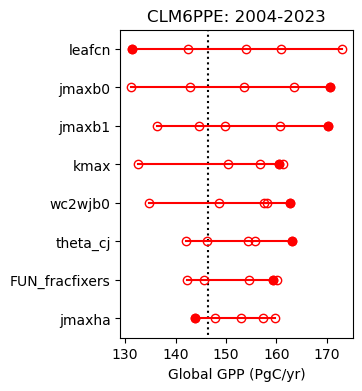

In [135]:
#compute metric and plot
x=cf*ds.GPP_global_amean.sel(year=slice(2004,2023)).mean(dim='year')
xlab='Global GPP (PgC/yr)'
tstr='CLM6PPE: 2004-2023'
rank_plot(x,g,xlab,tstr)

In [139]:
v='TOTVEGC'
vv=v+'_global_amean'
cf=1e-9*la.sum()
xm=cf*ds[vv].sel(year=slice(2004,2023)).mean(dim='year')
pi=cf*ds[vv].sel(year=slice(1854,1873)).mean(dim='year')
pfc=cf*ds[vv].sel(year=slice(1984,2023)).polyfit(dim='year',deg=1)
xt=pfc.polyfit_coefficients.sel(degree=1)
xs=[xm,xt,xm/pi]
labs=['mean','trend','forcing']

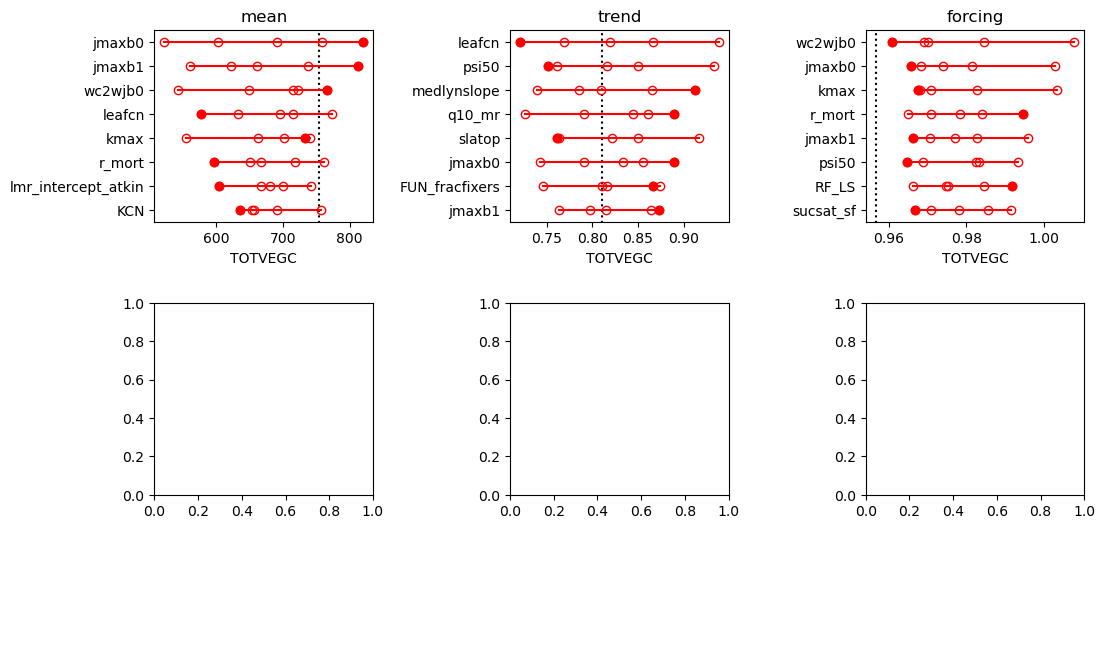

In [140]:
fig,axs=plt.subplot_mosaic('AXBYC;ZZZZZ;DUETF;SSSSS;VGGGW',
                           figsize=[12,8],
                           gridspec_kw={'width_ratios': [3,1,3,1,3],'height_ratios': [3,0.6,3, 0.2,1.5]})
for a in 'GSTUVWXYZ':
    axs[a].axis('off')

hs='ABC'
for h,x,lab in zip(hs,xs,labs):
    ax=axs[h]
    rank_plot(x,g,v,lab,ax=ax)

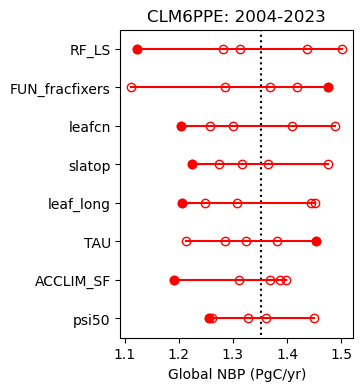

In [7]:
#compute metric and plot
x=cf*ds.NBP_global_amean.sel(year=slice(2004,2023)).mean(dim='year')
xlab='Global NBP (PgC/yr)'
tstr='CLM6PPE: 2004-2023'
rank_plot(x,g,xlab,tstr,topn=8)
plt.savefig('figs/NBP_rankings.png',dpi=300,bbox_inches='tight')

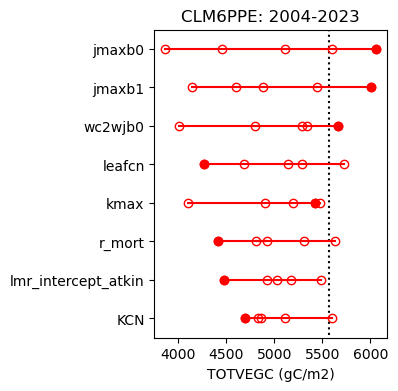

In [353]:
#compute metric and plot
x=ds.TOTVEGC_global_amean.sel(year=slice(2004,2023)).mean(dim='year')
xlab='TOTVEGC (gC/m2)'
tstr='CLM6PPE: 2004-2023'
rank_plot(x,g,xlab,tstr,topn=8)


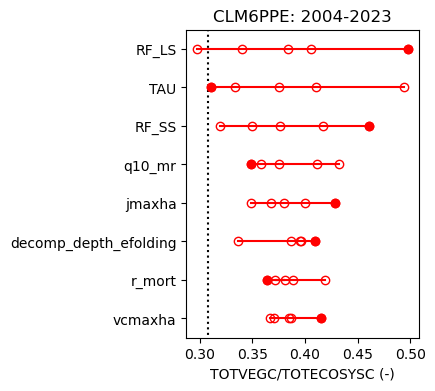

In [355]:
x=(ds.TOTVEGC_global_amean.sel(year=slice(2004,2023)).mean(dim='year')/
   ds.TOTECOSYSC_global_amean.sel(year=slice(2004,2023)).mean(dim='year'))
xlab='TOTVEGC/TOTECOSYSC (-)'
tstr='CLM6PPE: 2004-2023'
rank_plot(x,g,xlab,tstr,topn=8)
plt.savefig('figs/TVCfrac_rankings.png',dpi=300,bbox_inches='tight')

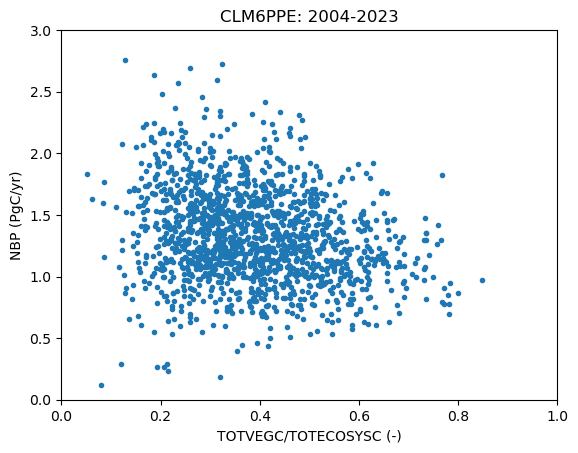

In [357]:
x=(ds.TOTVEGC_global_amean.sel(year=slice(2004,2023)).mean(dim='year')/
   ds.TOTECOSYSC_global_amean.sel(year=slice(2004,2023)).mean(dim='year'))
n=cf*ds.NBP_global_amean.sel(year=slice(2004,2023)).mean(dim='year')
plt.plot(x,n,'.')
plt.xlabel('TOTVEGC/TOTECOSYSC (-)')
plt.ylabel('NBP (PgC/yr)')
plt.xlim([0,1])
plt.ylim([0,3])
plt.title('CLM6PPE: 2004-2023')
plt.savefig('figs/NBP_v_TVCFRAC.png',dpi=300,bbox_inches='tight')

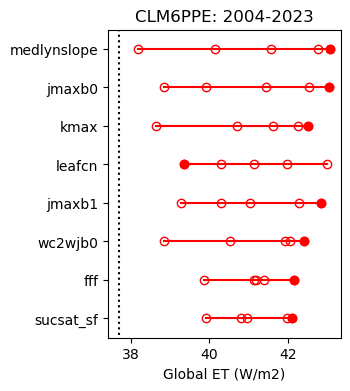

In [225]:
#compute metric and plot
x=ds.EFLX_LH_TOT_global_amean.sel(year=slice(2004,2023)).mean(dim='year')
xlab='Global ET (W/m2)'
tstr='CLM6PPE: 2004-2023'
rank_plot(x,g,xlab,tstr,topn=8)

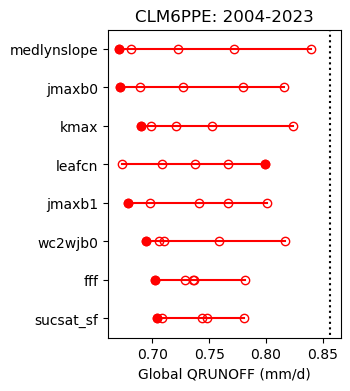

In [386]:
#compute metric and plot
x=24*60*60*ds.QRUNOFF_global_amean.sel(year=slice(2004,2023)).mean(dim='year')
xlab='Global QRUNOFF (mm/d)'
tstr='CLM6PPE: 2004-2023'
rank_plot(x,g,xlab,tstr,topn=8)

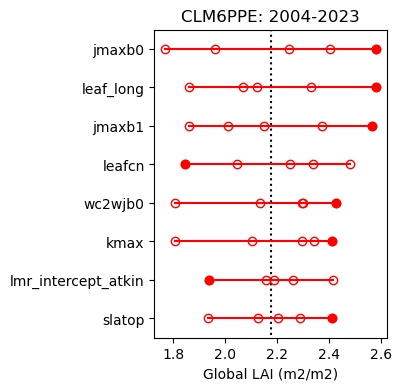

In [226]:
#compute metric and plot
x=ds.TLAI_global_amean.sel(year=slice(2004,2023)).mean(dim='year')
xlab='Global LAI (m2/m2)'
tstr='CLM6PPE: 2004-2023'
rank_plot(x,g,xlab,tstr,topn=8)

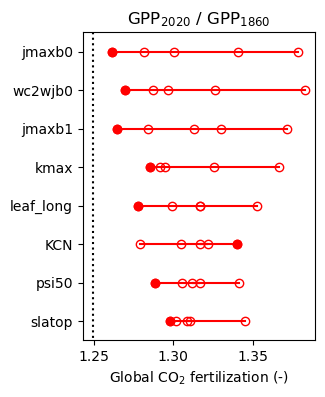

In [243]:
x=(ds.GPP_global_amean.sel(year=slice(2014,2023)).mean(dim='year')/
   ds.GPP_global_amean.sel(year=slice(1854,1863)).mean(dim='year'))
xlab='Global CO$_2$ fertilization (-)'
tstr='GPP$_{2020}$ / GPP$_{1860}$'
rank_plot(x,g,xlab,tstr,topn=8)

### maps

In [25]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [27]:
def brown_green():
    '''
    returns a colormap based on colorbrewer diverging brown->green
    '''

    # colorbrewer colormap, diverging, brown->green
    cmap = np.zeros([11,3]);
    cmap[0,:] = 84,48,5
    cmap[1,:] = 140,81,10
    cmap[2,:] = 191,129,45
    cmap[3,:] = 223,194,125
    cmap[4,:] = 246,232,195
    cmap[5,:] = 245,245,245
    cmap[6,:] = 199,234,229
    cmap[7,:] = 128,205,193
    cmap[8,:] = 53,151,143
    cmap[9,:] = 1,102,94
    cmap[10,:] = 0,60,48
    cmap = matplotlib.colors.ListedColormap(cmap/256)
    
    return cmap

In [5]:
#load data
d='/glade/work/linnia/CLM6-PPE/ctsm6_lhc/postp/'
f='ctsm6lhc_grid_amean_1850-2023.nc'
ds=xr.open_dataset(d+f)
la=xr.open_dataset('../utils/landarea_retrain_h0.nc').landarea

In [11]:
#load parameter key and define quantiles (in this case 5)
key = '/glade/work/linnia/CLM6-PPE/ctsm6_lhc/ctsm6lhc_11262024.txt'
params = pd.read_csv(key).drop(columns='member')
p0=xr.Dataset(params)
p=xr.concat([p0.isel(dim_0=0)*np.nan,p0],dim='dim_0') #adding a nan row for default sim
p['ens']=xr.DataArray(ds.ens.values,dims='dim_0')
p=p.swap_dims({'dim_0':'ens'})
g=np.floor(p*5)

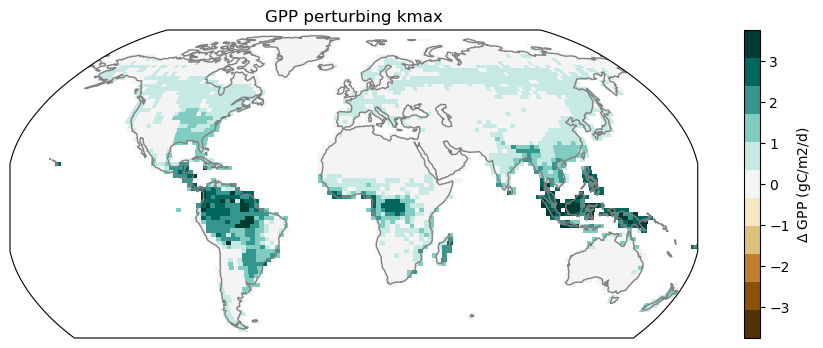

In [60]:
v='GPP'
param='kmax'

x=24*60*60*ds[v+'_gridded_amean'].sel(year=slice(2004,2023)).mean(dim='year').compute()
gg=g[param]
gg.name='param'
xg=x.groupby(gg).mean()
dx=xg.isel(param=4)-xg.isel(param=0)
u='gC/m2/d'

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111,projection=ccrs.Robinson()) # first row, first col
extent = [-180, 180,-60,90]
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.coastlines(color='grey')


get_map(dx).plot(cmap=brown_green(),transform=ccrs.PlateCarree(),
                 cbar_kwargs={'label':'$\Delta$ '+v+' ('+u+')'})
ax.set_title(v+' perturbing '+param);

In [144]:
def get_lim(dx,la):
    #can find a decent vmin/vmax if extreme pixels are drowning out the signal
    dxtot=abs((dx*la).sum())
    lmax=abs(dx).max().values
    l95=lmax
    incr=lmax/3
    cutoff=0.05
    for i in range(20):
        l95=l95-incr
        trunc=((abs(dx)>=l95)*(lmax-l95)*la).sum()/dxtot  # fraction of signal truncated
        if trunc>cutoff:
            l95+=incr
            incr=incr/2.5
    return l95

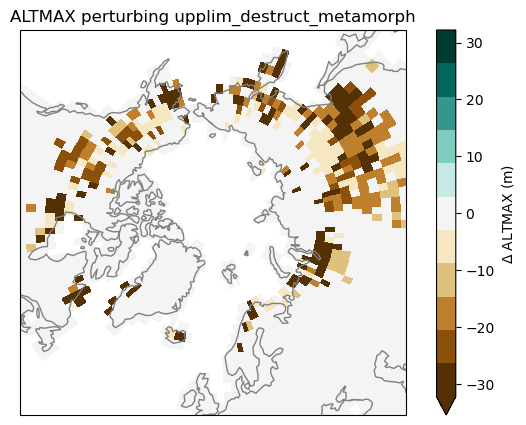

In [128]:
v='ALTMAX'
param='upplim_destruct_metamorph'

x=ds[v+'_gridded_amean'].sel(year=slice(2004,2023)).mean(dim='year').compute()
gg=g[param]
gg.name='param'
xg=x.groupby(gg).mean()
dx=xg.isel(param=4)-xg.isel(param=0)
u=ds[v+'_gridded_amean'].attrs['units']



fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111,projection=ccrs.NorthPolarStereo())
extent = [-180, 180,50,90]
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.coastlines(color='grey')

lim=get_lim(dx,la)
get_map(dx).plot(cmap=brown_green(),transform=ccrs.PlateCarree(),
                 cbar_kwargs={'label':'$\Delta$ '+v+' ('+u+')'},
                 vmin=-lim,vmax=lim)
ax.set_title(v+' perturbing '+param);

In [48]:
#ET trends
pfc=ds.EFLX_LH_TOT_gridded_amean.sel(year=slice(1980,2020)).polyfit(dim='year',deg=1).compute()
x=41*pfc.polyfit_coefficients.sel(degree=1)

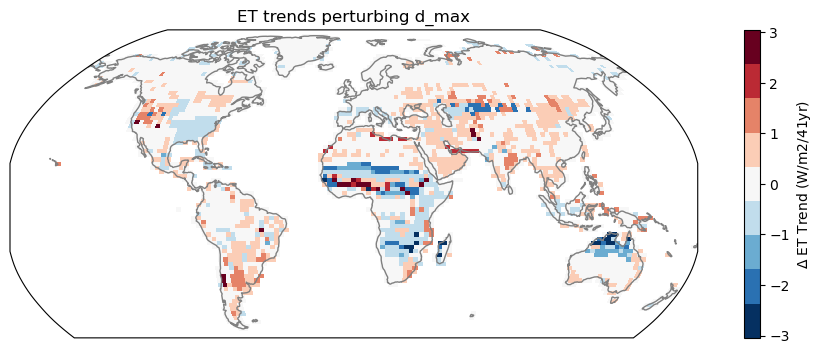

In [59]:
param='d_max'
gg=g[param]
gg.name='param'
xg=x.groupby(gg).mean()
dx=xg.isel(param=4)-xg.isel(param=0)
u='W/m2/41yr'
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111,projection=ccrs.Robinson()) # first row, first col
extent = [-180, 180,-60,90]
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.coastlines(color='grey')

cmap=plt.get_cmap("RdBu_r",9)
get_map(dx).plot(cmap=cmap,transform=ccrs.PlateCarree(),
                 cbar_kwargs={'label':'$\Delta$ ET Trend ('+u+')'})
ax.set_title('ET trends perturbing '+param);

### multi-parameter possible, but noisier.....

In [401]:
colors=plt.get_cmap('viridis',7).colors[1:-1]

In [402]:
x=cf*ds.GPP_global_amean.sel(year=slice(2004,2023)).mean(dim='year')
xq=xr.DataArray([x.groupby(g[p]).mean() for p in g.data_vars],dims=['param','qnt'])
xq['param']=g.data_vars
ix=np.argsort(abs(xq.isel(qnt=-1)-xq.isel(qnt=0)))

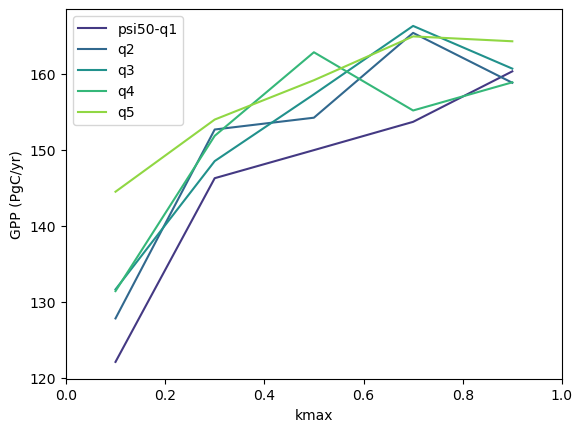

In [404]:
p1='kmax'
p2='psi50'
gg=g[p1]*5+g[p2]
xg=x.groupby(gg).mean().values.reshape([5,5])
for i,c in enumerate(colors):
    plt.plot(0.1+np.arange(5)/5,xg[:,i],color=c)
plt.xlabel(p1)

ll=['q'+str(i) for i in range(1,6)]
ll[0]=p2+'-'+ll[0]
plt.legend(ll)
plt.xlim([0,1])
plt.ylabel('GPP (PgC/yr)');